In [7]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.models import load_model
import cv2
import numpy as np
%matplotlib inline

In [8]:
(train_X,train_y),(test_X,test_y) = mnist.load_data()

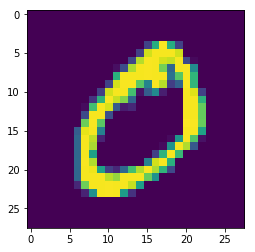

In [9]:
plt.imshow(train_X[1])

In [10]:
#normalize and reshaping our X data
train_X = train_X.reshape(-1,28,28,1)
test_X  = test_X.reshape(-1,28,28,1)

train_X = train_X.astype('float32')
test_X  = test_X.astype('float32')

train_X = train_X/255
test_X  = test_X/255

#one hot encode our y data
from keras.utils import np_utils 
train_y = np_utils.to_categorical(train_y)
test_y  = np_utils.to_categorical(test_y)

In [11]:
train_y[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [12]:
#creating our model
input_shape=(28,28,1)

from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dropout,Dense,MaxPooling2D
from keras.optimizers import Adam,SGD
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape,padding='SAME'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation='relu',padding='SAME'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=SGD(0.01),
              metrics=['accuracy'])

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)              

In [6]:
# training our data
batch_size=32
epochs=10

plotting_data = model.fit(train_X,
                          train_y,
                          batch_size=batch_size,
                          epochs=epochs,
                          verbose=1,
                          validation_data=(test_X,test_y))

loss,accuracy = model.evaluate(test_X,test_y,verbose=0)
print('Test loss ---> ',str(round(loss*100,2)) +str('%'))
print('Test accuracy ---> ',str(round(accuracy*100,2)) +str('%'))

ValueError: Error when checking input: expected conv2d_1_input to have 4 dimensions, but got array with shape (60000, 28, 28)

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


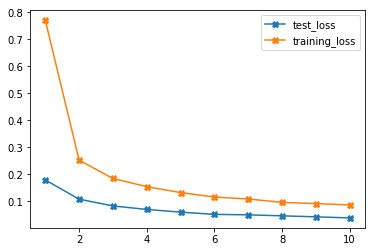

In [89]:
plotting_data_dict = plotting_data.history
print(plotting_data_dict.keys())
test_loss = plotting_data_dict['val_loss']
training_loss = plotting_data_dict['loss']
test_accuracy = plotting_data_dict['val_accuracy']
training_accuracy = plotting_data_dict['accuracy']

epochs = range(1,len(test_loss)+1)

plt.plot(epochs,test_loss,marker='X',label='test_loss')
plt.plot(epochs,training_loss,marker='X',label='training_loss')
plt.legend()

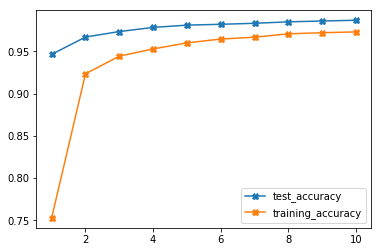

In [92]:
plt.plot(epochs,test_accuracy,marker='X',label='test_accuracy')
plt.plot(epochs,training_accuracy,marker='X',label='training_accuracy')
plt.legend()

In [93]:
model.save('MNIST_10_epochs')
print('Model Saved !!!')

Model Saved !!!


In [13]:
classifier = load_model('MNIST_10_epochs.h5')

W1113 09:47:08.437179  3728 deprecation_wrapper.py:119] From C:\Users\sharma ji\AppData\Roaming\Python\Python37\site-packages\keras\backend\tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



In [14]:
for i in range(0,10):
    random_image = np.random.randint(0,len(test_X))
    input_img = test_X[random_image]
    input_L = cv2.resize(input_img,None,fx=5,fy=5,interpolation=cv2.INTER_CUBIC)
    input_img = input_img.reshape([1,28,28,1])
    res = classifier.predict_classes(input_img,1,verbose=0)[0]
    cv2.putText(input_L,text=str(res),org=(120,30),fontFace=cv2.FONT_HERSHEY_SIMPLEX,fontScale=1,color=(255,55,0),thickness=2)
    cv2.imshow('test images',input_L)
    cv2.waitKey(0)
cv2.destroyAllWindows()

# live predictor


In [16]:
drawing=False
cv2.namedWindow('win')
black_image = np.zeros((256,256,3),np.uint8)
ix,iy=-1,-1

def draw_circles(event,x,y,flags,param):
    global ix,iy,drawing
    if event== cv2.EVENT_LBUTTONDOWN:
        drawing=True
        ix,iy=x,y
        
    elif event==cv2.EVENT_MOUSEMOVE:
        if drawing==True:
            cv2.circle(black_image,(x,y),5,(255,255,255),-1)
            
    elif event==cv2.EVENT_LBUTTONUP:
        drawing = False
        
cv2.setMouseCallback('win',draw_circles)

while True:
    cv2.imshow('win',black_image)
    if cv2.waitKey(1)==27:
        break
    elif cv2.waitKey(1)==13:
        input_img = cv2.resize(black_image,(28,28))
        input_img = cv2.cvtColor(input_img,cv2.COLOR_BGR2GRAY)
        cv2.imshow('resized',input_img)
        input_img = input_img.reshape(1,28,28,1)
        res = classifier.predict_classes(input_img,1,verbose=0)[0]
        cv2.putText(black_image,text=str(res),org=(205,30),fontFace=cv2.FONT_HERSHEY_SIMPLEX,fontScale=1,color=(255,255,255),thickness=2)
    elif cv2.waitKey(1)==ord('c'):
        black_image = np.zeros((256,256,3),np.uint8)
        ix,iy=-1,-1
cv2.destroyAllWindows()